**The following has to be done using Bayesian learning (Naïve Bayes classifier):**

TASK 1) Randomly divide the data into 80% for training and 20% for testing.

    a)	Handle the missing values in both train and test set. [5]
    b)	Encode categorical variables using appropriate encoding method (in-built function allowed). [5]
    c)	After completing step (a) and (b), compute 5-fold cross validation on the training set 
          (normalisation of data is allowed, if required). Print the final test accuracy. [10]


TASK 2) Apply PCA (select number of components by preserving 95% of total variance) on the processed data from step (1). 

    a)	Plot the graph for PCA (in-built function allowed for PCA and visualisation). [20]
    b)	Use the features extracted from PCA to train your model. Compute 5-fold cross 
          validation on the training set (normalisation of data is allowed, if required). 
    c)    Print the final test accuracy. [10]


---


TASK 3) Using the processed data from step (1), apply the following:

    a)	A feature value is considered as an outlier if its value is greater than mean + 3 x standard deviation.
          A sample having maximum such outlier features must be dropped. [5] 
    b)	Using the sequential backward selection method, remove features. [15]
    c)	Print the final set of features formed. [5]
    d)	Compute 5-fold cross validation on the training set (normalisation of data is allowed if required).
           Print the final test accuracy. [5]

TASK 4) Report and results. [20]

    Use Train_F.csv as data for this assignment. The “severity_county_5-day” column will be used as labels.

# **Load Dataset**

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1h6IzjhxjFUh0JPD53bGbUeQeR_FOD9j0'}) 
downloaded.GetContentFile('Train_F.csv') 

## **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data = pd.read_csv('Train_F.csv') 

In [ ]:
data.sample(10)

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
2498,29205,Shelby,MO,1.3,1.5,1.8,2.1,2.3,2.6,3.0,1
1359,37015,Bertie,NC,11.2,11.4,11.6,11.7,11.9,12.1,12.2,2
1496,19125,Marion,IA,9.2,9.4,9.6,9.8,9.9,10.1,10.2,2
1086,37131,Northampton,NC,17.2,17.5,17.7,17.9,18.2,18.4,18.7,2
2023,48207,Haskell,TX,3.4,3.8,4.2,4.6,5.1,5.5,6.1,3
2306,18175,Washington,IN,2.3,2.5,2.8,3.0,3.2,3.4,3.6,1
2859,27075,Lake,MN,0.1,0.3,0.4,0.6,0.7,0.9,1.1,1
1883,46113,Shannon,SD,4.6,5.1,5.6,6.1,6.6,7.1,7.6,3
2298,48487,Wilbarger,TX,2.3,2.6,2.8,3.1,3.4,3.7,4.0,2
1071,26159,Van Buren,MI,18.0,18.0,18.0,18.0,18.0,18.0,18.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyfips                      3142 non-null   int64  
 1   countyname                      3142 non-null   object 
 2   statename                       3142 non-null   object 
 3   predicted_deaths_by_october_06  3142 non-null   float64
 4   predicted_deaths_by_october_07  3142 non-null   float64
 5   predicted_deaths_by_october_08  3142 non-null   float64
 6   predicted_deaths_by_october_09  3142 non-null   float64
 7   predicted_deaths_by_october_10  3142 non-null   float64
 8   predicted_deaths_by_october_11  3142 non-null   float64
 9   predicted_deaths_by_october_12  3142 non-null   float64
 10  severity_county_5-day           3142 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 270.1+ KB


In [ ]:
data.describe()

,countyfips,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.688415,66.508561,66.878771,67.247199,67.617218,67.990834,68.367027,68.750414,1.984723
std,15162.445759,329.283634,330.028950,330.789167,331.564638,332.356617,333.167565,333.999863,0.822570
min,1001.000000,0.100000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,1.000000
25%,18177.500000,2.300000,2.500000,2.800000,3.000000,3.300000,3.500000,3.800000,1.000000
50%,29176.000000,8.200000,8.400000,8.700000,8.900000,9.200000,9.500000,9.900000,2.000000
75%,45080.500000,29.500000,29.975000,30.150000,30.300000,30.575000,30.800000,31.000000,3.000000
max,56045.000000,7348.200000,7356.800000,7366.000000,7375.600000,7385.800000,7396.500000,7407.800000,3.000000


In [ ]:
data.isnull().sum()

countyfips                        0
countyname                        0
statename                         0
predicted_deaths_by_october_06    0
predicted_deaths_by_october_07    0
predicted_deaths_by_october_08    0
predicted_deaths_by_october_09    0
predicted_deaths_by_october_10    0
predicted_deaths_by_october_11    0
predicted_deaths_by_october_12    0
severity_county_5-day             0
dtype: int64

In [ ]:
print(data['statename'].unique())
print(len(data['statename'].unique()))

['NY' 'CA' 'IL' 'AZ' 'FL' 'MI' 'TX' 'MA' 'NJ' 'PA' 'CT' 'NV' 'MN' 'RI'
 'MD' 'IN' 'MO' 'WA' 'OH' 'DC' 'LA' 'VA' 'GA' 'WI' 'TN' 'CO' 'NC' 'AL'
 'DE' 'KY' 'SC' 'NH' 'IA' 'UT' 'NM' 'OK' 'NE' 'MS' 'AR' 'KS' 'ID' 'OR'
 'HI' 'WV' 'SD' 'ND' 'ME' 'MT' 'VT' 'AK' 'WY']
51


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


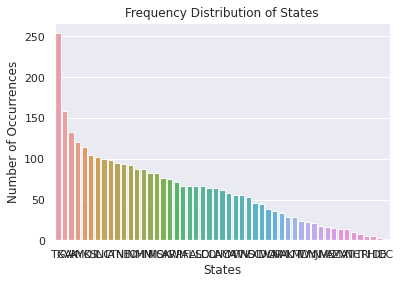

In [ ]:
states_count = data['statename'].value_counts()
sns.barplot(states_count.index, states_count.values, alpha=0.9)
plt.title('Frequency Distribution of States')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.show()

In [ ]:
print(data['countyname'].unique())
print(len(data['countyname'].unique()))

['Kings' 'Queens' 'Los Angeles' ... 'Wolfe' 'Daggett' 'Yakutat']
1845


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


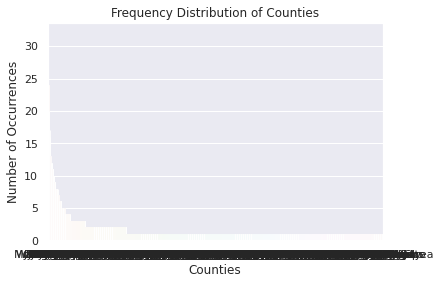

In [ ]:
county_count = data['countyname'].value_counts()
sns.barplot(county_count.index, county_count.values, alpha=0.9)
plt.title('Frequency Distribution of Counties')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Counties', fontsize=12)
plt.show()

In [ ]:
print(data['severity_county_5-day'].unique())
print(len(data['severity_county_5-day'].unique()))

[3 2 1]
3


In [ ]:
print(data['countyfips'].unique())
print(len(data['countyfips'].unique()))

[36047 36081  6037 ... 21237 49009  2282]
3142


In [ ]:
data[['predicted_deaths_by_october_06', 'severity_county_5-day']].groupby(['severity_county_5-day']).mean().sort_values(by='severity_county_5-day', ascending=True)

,predicted_deaths_by_october_06
severity_county_5-day,
1,5.789512
2,38.487992
3,157.433013


In [ ]:
data[['predicted_deaths_by_october_07', 'severity_county_5-day']].groupby(['severity_county_5-day']).mean().sort_values(by='severity_county_5-day', ascending=True)

,predicted_deaths_by_october_07
severity_county_5-day,
1,5.951426
2,38.681693
3,158.193744


In [ ]:
data[['predicted_deaths_by_october_08', 'severity_county_5-day']].groupby(['severity_county_5-day']).mean().sort_values(by='severity_county_5-day', ascending=True)

,predicted_deaths_by_october_08
severity_county_5-day,
1,6.107176
2,38.880217
3,158.950818


In [ ]:
data[['predicted_deaths_by_october_09', 'severity_county_5-day']].groupby(['severity_county_5-day']).mean().sort_values(by='severity_county_5-day', ascending=True)

,predicted_deaths_by_october_09
severity_county_5-day,
1,6.264121
2,39.081398
3,159.708855


In [ ]:
data[['predicted_deaths_by_october_10', 'severity_county_5-day']].groupby(['severity_county_5-day']).mean().sort_values(by='severity_county_5-day', ascending=True)

,predicted_deaths_by_october_10
severity_county_5-day,
1,6.427415
2,39.284646
3,160.469105


In [ ]:
x=data[['predicted_deaths_by_october_11', 'severity_county_5-day']].groupby(['severity_county_5-day']).mean().sort_values(by='severity_county_5-day', ascending=True)

In [ ]:
#This is actually useless, and will completely mislead the model while training
def encode_county(df):
  count = county_counts[county_counts_index.index(df['countyname'])]
  if count > 25 : 
    return "Very Common"
  elif count > 15:
    return "Common"
  elif count > 5:
    return "Rare"
  else:
    return "Very Rare"

county_counts = county_count.tolist()
county_counts_index = county_count.index.tolist()
#data1['countyname']=data1.apply(encode_county,axis=1)

# **Aninav Bayesian Classifier**

**fetchData: Function to fetch data from directory**

In [ ]:
def fetchData():
  data = pd.read_csv('Train_F.csv') 
  return data

**fillMissingValues: Function to fill Missing Value**

In [ ]:
def fillMissingValues(df):
  cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
  continous_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
  
  for column in df:
      if df[column].isnull().any():
          if(column in cateogry_columns):
              df[column]=df[column].fillna(df[column].mode()[0])
          else:
              df[column]=df[column].fillna(df[column].mean)
  
  return df

**encode : Function to encode continous variables into categorical variables**

In [ ]:
#Helper function
def createBin(x,max_val):
  frac = x/max_val
  if frac < 0.25:
    return "Small"
  elif frac >=0.25 and frac < 0.5:
    return "Moderate"
  elif frac >=0.5 and frac < 0.75:
    return "Large"
  else:
    return "Very Large"


def encode(df):
    '''
    Recodes the continous feature (variable) values into quartiles, such that values 
    less than the 25th percentile are assigned 'Small', 25th to 50th 'Moderate', 
    50th to 75th 'Large' and greater than the 75th percentile 'Very Large'
    '''
    continous_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
    continous_columns.remove(data.columns[-1])
    for feature in continous_columns:
      max_val = df[feature].max()
      #df[feature] = df.apply(createBin(df,feature,max_val),axis=1)
      df[feature] = df[feature].apply(lambda x: createBin(x,max_val))

    return df

**train: Function to train NB model**

In [ ]:
def train(df,target, attributes):

    label_classes = df[target].unique()
    '''
    Data structure used to store probabilities : 3 dimensional Dictionary 
    Element prob_dict[k][j][i] stores probability of occurence of jth value of kth attribute given that ith class is TRUE
    
    Simpler Format : prob_dict[attribute][attr_value][class]

    '''
    prob_dict = {}    #Main Dictionary 

    for attribute in attributes:
        
        attr_values = df[attribute].unique()
        conditional_prob_dict = {}                #Stores For all attr_value -> [ P(attr_value | class1), P(attr_value | class2), P(attr_value | class3)]
        
        for attr_value in attr_values:
            conditional_prob = {}
            for label_class in label_classes:                
                numerator = (df[df[attribute] == attr_value].index & df[df[target] == label_class].index).shape[0] + 1  #Adding 1 to avoid zero proabability
                denominator = df[df[target] == int(label_class)].shape[0] + len(df[attribute].unique())                 #Adding m (no. of classes) to avoid zero denominator
                probability = numerator / denominator
                
                conditional_prob[label_class] = probability

            conditional_prob_dict[attr_value] = conditional_prob       #[ P(attr_value | class1), P(attr_value | class2), P(attr_value | class3)]

        prob_dict[attribute] = conditional_prob_dict

        #Calculating class probabilities
        prob_class={}
        for label_class in label_classes:
          prob_class[label_class] = (df[df[target] == label_class].shape[0] / df.shape[0])

    return prob_dict,prob_class

**predict : Function to predict labels**

In [ ]:
def predict(prob_dict,prob_class,attributes,label_classes,datapoint):
  
    prob_max=0
    for label_class in label_classes:
      prob=1
      for attribute in attributes:
        prob = prob * prob_dict[attribute][datapoint[attribute]][label_class]
      
      prob=prob*prob_class[label_class]

      if prob > prob_max:
        prob_max = prob
        label = label_class

    return label

def getPrediction(prob_dict,prob_class,attributes,label_classes,test):
  preds=[]
  for i in range(0,len(test)):
    preds.append(predict(prob_dict,prob_class,attributes,label_classes,test.iloc[i]))
  
  return preds

**getAccuracy : Function to calculate accuracy of classifier**

In [ ]:
def getAccuracy(preds,labels):
  if len(preds) != len(labels):
    print("Shape of Actual label array & predicted label array should be same.")
    exit(1)
  correct_count=0
  for i in range(0,len(preds)):
    if(preds[i]==labels[i]):
      correct_count+=1

  return correct_count/len(preds)

**Main Driver Function**

In [ ]:
import numpy as np
import pandas as pd
data = fetchData()
data = fillMissingValues(data)
data = encode(data)
data = pd.get_dummies(data,drop_first=True) #Encoding categorical 
attributes=data.columns[1:].tolist()
target=data.columns[0]
label_classes=data[target].unique()

In [ ]:
probs,prob_class = train(data,target,attributes)
preds = getPrediction(probs,prob_class,attributes,label_classes,data)
acc = getAccuracy(preds,data[target])

In [ ]:
print("Accuracy is " + str(round(acc,4)*100) + "%")

Accuracy is 70.43%
